In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [62]:
# load data
houses = pd.read_csv("data_assignment2.csv")
houses

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


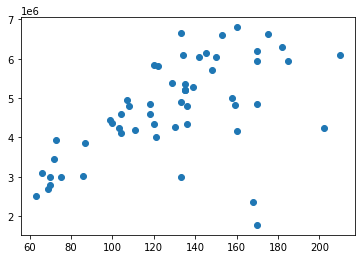

In [63]:
# Scatter plot living area vs prices
plt.scatter(houses[['Living_area']], houses[['Selling_price']])
plt.show()


In [64]:
# Model linear regression area and price
model = LinearRegression().fit(houses[['Living_area']], houses[['Selling_price']])


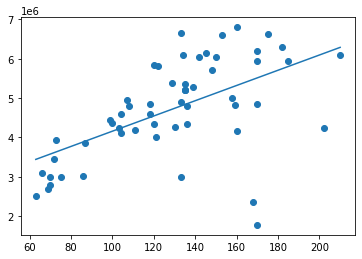

In [65]:
# Plot data and fit
xfit=np.linspace(min(houses['Living_area']),max(houses['Living_area']), 1000) #1000 evenly spaced points in [0, 55].
yfit=model.predict(xfit[:, np.newaxis])
plt.scatter(houses[['Living_area']], houses[['Selling_price']])
plt.plot(xfit, yfit)
plt.show()

Text(0, 0.5, 'Residuals')

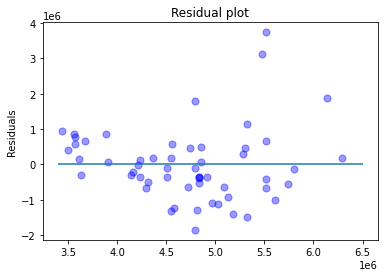

In [66]:
# Residual plot
pred_price = model.predict(houses[['Living_area']])
residuals = pred_price - houses[['Selling_price']]
plt.scatter(pred_price, residuals, c = 'b', s = 50, alpha = 0.4)
plt.hlines(y = 0, xmin = 3400000, xmax = 6500000)
plt.title('Residual plot')
plt.ylabel('Residuals')

In [67]:
# Extract indicies of outliers
outliers_ind = residuals[abs(residuals) > 1700000].dropna()
outliers_ind = outliers_ind.index
outliers_ind

Int64Index([5, 9, 24, 40, 45], dtype='int64')

In [68]:
# Remove indicies from data
houses = houses.drop(houses.index[[outliers_ind]])
houses

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
10,11,121,4.0,1575.0,112.0,81,4000000
11,12,136,6.0,381.0,NaN,42,4350000


In [69]:
# New model linear regression area and price
model = LinearRegression().fit(houses[['Living_area']], houses[['Selling_price']])

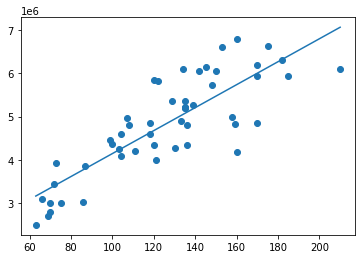

In [70]:
# Scatter plot of data and fitted model
xfit=np.linspace(min(houses['Living_area']),max(houses['Living_area']), 1000) #1000 evenly spaced points in [0, 55].
yfit=model.predict(xfit[:, np.newaxis])
plt.scatter(houses[['Living_area']], houses[['Selling_price']])
plt.plot(xfit, yfit)
plt.show()

In [71]:
# slope
print(model.coef_)

# intersection
print(model.intercept_)

In [72]:
# Output of predictions: area 100^2, 150^2 and 200^2 
print(pred_100 = model.predict([[100]]))
print(pred_150 = model.predict([[150]]))
print(pred_200 = model.predict([[200]]))

Text(0, 0.5, 'Residuals')

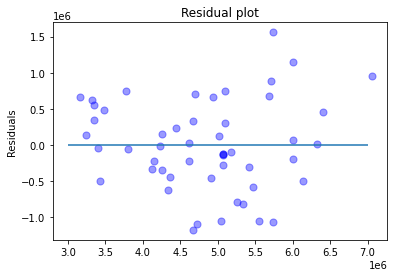

In [58]:
# Residual plot new model
pred_price = model.predict(houses[['Living_area']])
residuals = pred_price - houses[['Selling_price']]
plt.scatter(pred_price, residuals, c = 'b', s = 50, alpha = 0.4)
plt.hlines(y = 0, xmin = 3400000, xmax = 6500000)
plt.title('Residual plot')
plt.ylabel('Residuals')


In [22]:
# load iris data and create dataframe
from sklearn.datasets import load_iris
iris_raw = load_iris()

iris = pd.DataFrame(iris_raw.data , columns = iris_raw.feature_names)
iris['species'] = iris_raw.target 
iris['species'] = iris['species'].replace(to_replace= [0, 1, 2], 
    value = ['setosa', 'versicolor', 'virginica'])


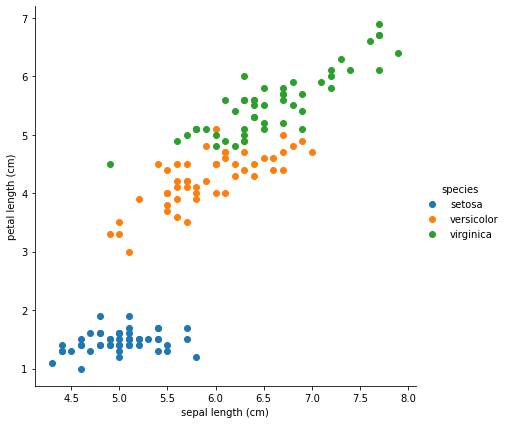

In [23]:
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


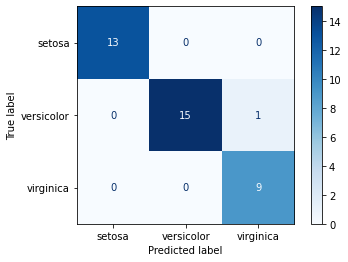

In [24]:
# Split into trainging and test sets
x_train, x_test, y_train, y_test = train_test_split(iris[iris.columns[0:4]], 
                                                    iris[['species']], 
                                                    test_size=0.25, random_state=0)

# Fit logistic regression model to training data
model = LogisticRegression().fit(x_train, y_train)

# PLot confusion matrix
plot_confusion_matrix(model,x_test,y_test, cmap='Blues')


In [25]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
#%%

y_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   

plot_confusion_matrix(model_knn,x_test,y_test, cmap='Blues')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


NameError: name 'metrics' is not defined